In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import seaborn as sns

In [8]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 41s 4us/step


In [11]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Creating Validation set

In [18]:
x_valid = X_train_full[:5000]/255
x_train = X_train_full[5000:]/255

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_test = X_test / 255.

In [20]:
x_valid 

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Visualisation 

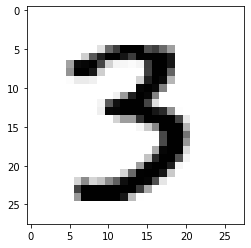

In [25]:
plt.imshow(x_train[5000], cmap="binary")
#plt.axis('off')
plt.show()


<AxesSubplot:>

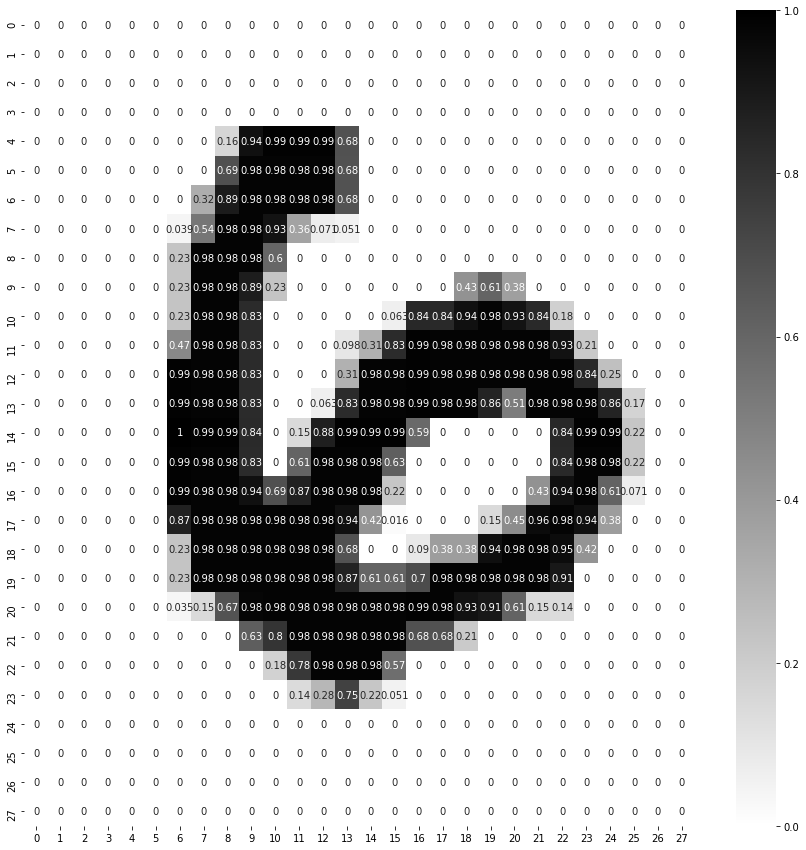

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[4000],annot=True,cmap="binary")

<AxesSubplot:>

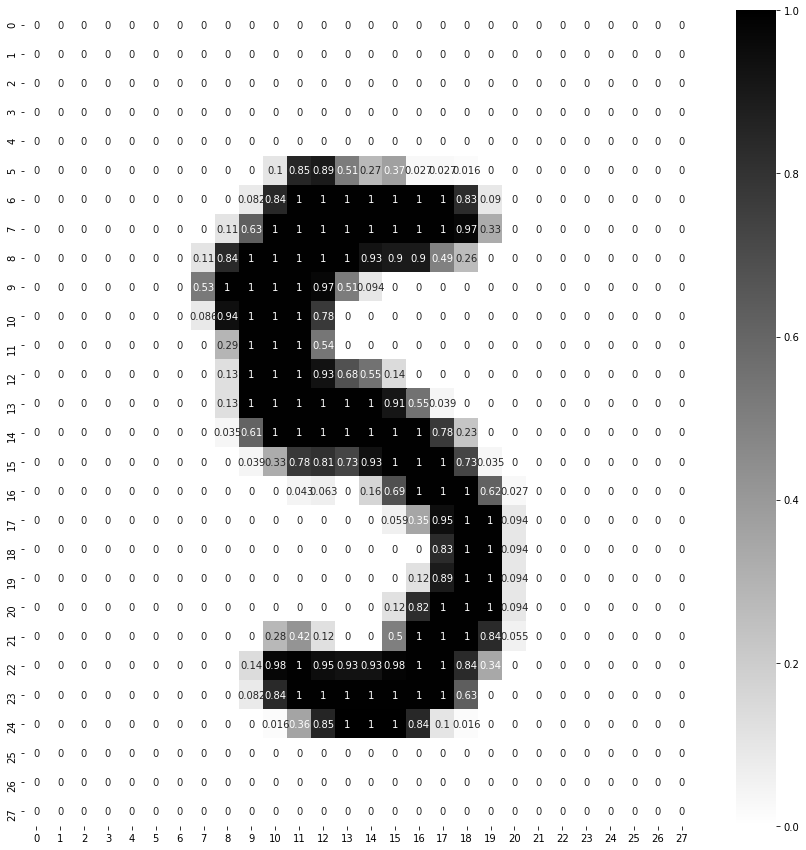

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[60],annot=True,cmap="binary")

In [35]:
print(x_train.shape)
print(y_train.shape)

(55000, 28, 28)
(55000,)


In [36]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [37]:
model_clf.layers

In [39]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [40]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [42]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [43]:
type(hidden1.get_weights())

list

In [44]:
hidden1.get_weights()

[array([[ 0.02546895, -0.03162991,  0.0655659 , ..., -0.03362231,
          0.06791721, -0.03195726],
        [-0.03111828,  0.01052635, -0.01231497, ..., -0.02236062,
          0.05646889,  0.0348748 ],
        [-0.06638879,  0.00288841, -0.05390479, ...,  0.02262603,
         -0.00082305,  0.0065278 ],
        ...,
        [-0.05847209, -0.05169234, -0.06056079, ...,  0.02808342,
         -0.05544543, -0.05159621],
        [-0.06615113,  0.03603683,  0.01671438, ..., -0.0479354 ,
          0.02561963,  0.01516168],
        [-0.01957605,  0.04134823, -0.05159447, ...,  0.06889406,
          0.0561028 , -0.02857808]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [45]:
weights, biases = hidden1.get_weights()

In [48]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 0.02546895, -0.03162991,  0.0655659 , ..., -0.03362231,
         0.06791721, -0.03195726],
       [-0.03111828,  0.01052635, -0.01231497, ..., -0.02236062,
         0.05646889,  0.0348748 ],
       [-0.06638879,  0.00288841, -0.05390479, ...,  0.02262603,
        -0.00082305,  0.0065278 ],
       ...,
       [-0.05847209, -0.05169234, -0.06056079, ...,  0.02808342,
        -0.05544543, -0.05159621],
       [-0.06615113,  0.03603683,  0.01671438, ..., -0.0479354 ,
         0.02561963,  0.01516168],
       [-0.01957605,  0.04134823, -0.05159447, ...,  0.06889406,
         0.0561028 , -0.02857808]], dtype=float32)

In [49]:
print("shape\n", biases.shape)
biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [50]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [51]:
EPOCHS = 30
VALIDATION_SET = (x_valid, y_valid)

history = model_clf.fit(x_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6219 - accuracy: 0.8397 - val_loss: 0.3104 - val_accuracy: 0.9160
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2935 - accuracy: 0.9158 - val_loss: 0.2416 - val_accuracy: 0.9312
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2398 - accuracy: 0.9315 - val_loss: 0.2065 - val_accuracy: 0.9418
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2050 - accuracy: 0.9416 - val_loss: 0.1774 - val_accuracy: 0.9500
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1779 - accuracy: 0.9494 - val_loss: 0.1633 - val_accuracy: 0.9548
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1574 - accuracy: 0.9550 - val_loss: 0.1505 - val_accuracy: 0.9622
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1409 - accuracy: 0.9604 - val_loss: 0.1353 - val_accuracy: